In [1]:
!rm -rf /content/sample_data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/jeya-maria-jose/Medical-Transformer

Cloning into 'Medical-Transformer'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 166 (delta 40), reused 28 (delta 28), pack-reused 111
Receiving objects: 100% (166/166), 1.19 MiB | 9.10 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [4]:
!gdown --id 1JZN9Jq9km0rZNiYNEukE_8f0CsSK3Pe4

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1JZN9Jq9km0rZNiYNEukE_8f0CsSK3Pe4
From (redirected): https://drive.google.com/uc?id=1JZN9Jq9km0rZNiYNEukE_8f0CsSK3Pe4&confirm=t&uuid=0c90823b-5915-478d-b285-547a781b2e42
To: /content/MoNuSegTrainingData.zip
100% 84.1M/84.1M [00:00<00:00, 98.9MB/s]


In [5]:
!7z x MoNuSegTrainingData.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 84126760 bytes (81 MiB)

Extracting archive: MoNuSegTrainingData.zip
--
Path = MoNuSegTrainingData.zip
Type = zip
Physical Size = 84126760

  0%     23% 16 - MoNuSegTrainingData/Annotations/TCGA-CH-5767-01Z-00-DX1.xml                                                                      39% 24 - MoNuSegTrainingData/Annotations/TCGA-G9-6362-01Z-00-DX1.xml                                                                      57% 29 - MoNuSeg

In [6]:
!gdown --id 1NKkSQ5T0ZNQ8aUhh0a8Dt2YKYCQXIViw

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1NKkSQ5T0ZNQ8aUhh0a8Dt2YKYCQXIViw
From (redirected): https://drive.google.com/uc?id=1NKkSQ5T0ZNQ8aUhh0a8Dt2YKYCQXIViw&confirm=t&uuid=db16e51b-f52a-44f5-a53c-119e5e5686ed
To: /content/MoNuSegTestData.zip
100% 41.6M/41.6M [00:00<00:00, 44.0MB/s]


In [7]:
!7z x MoNuSegTestData.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 41620178 bytes (40 MiB)

Extracting archive: MoNuSegTestData.zip
--
Path = MoNuSegTestData.zip
Type = zip
Physical Size = 41620178

  0%     37% 10 - MoNuSegTestData/TCGA-AC-A2FO-01A-01-TS1.xml                                                      77% 21 - MoNuSegTestData/TCGA-HC-7209-01A-01-TS1.tif                                                     Everything is Ok

Folders: 1
Files: 28
Size:       60571259
Compressed: 41620178


In [8]:
from xml.dom import minidom

# parse an xml file by name
mydoc = minidom.parse('/content/MoNuSegTrainingData/Annotations/TCGA-38-6178-01Z-00-DX1.xml')

Regions = mydoc.getElementsByTagName('Region')

In [9]:
import numpy as np
xy=[]
for index,region in enumerate(Regions):
  vertices=region.getElementsByTagName('Vertex')
  xy.append([(float(vertex.getAttribute('X')),float(vertex.getAttribute('Y'))) for i,vertex in enumerate(vertices)])


Text(0.5, 1.0, 'Original image')

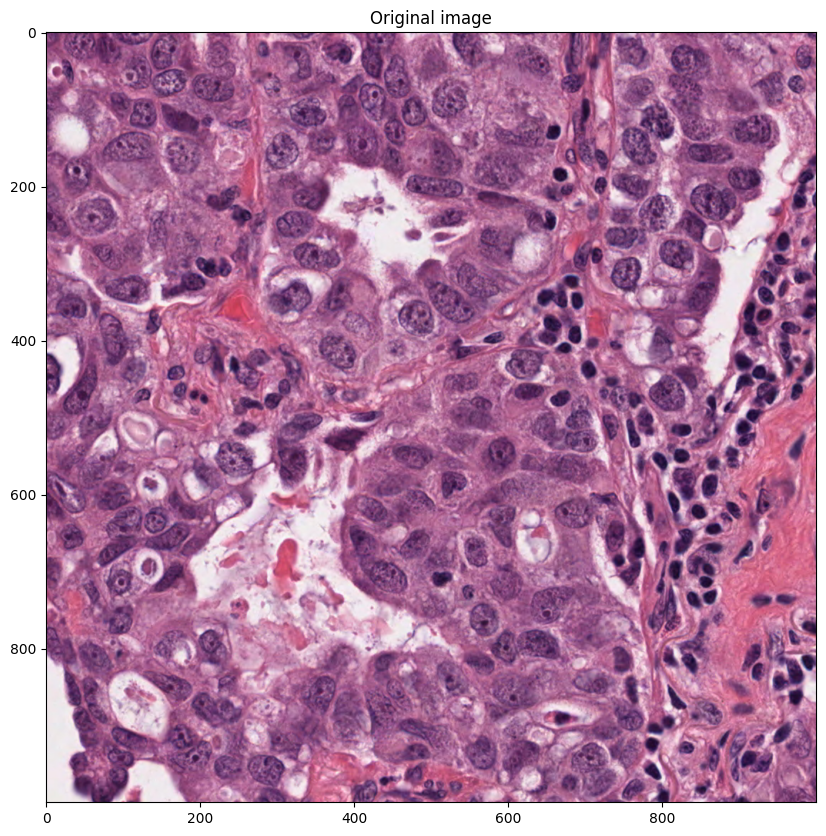

In [10]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
img=np.array(Image.open('/content/MoNuSegTrainingData/Tissue Images/TCGA-38-6178-01Z-00-DX1.tif'))
img.shape
#img=img.resize(256,256)
# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [11]:
img = Image.new('L', (1000, 1000), 0)
for i in xy:
  ImageDraw.Draw(img).polygon(i, outline=1, fill=1)

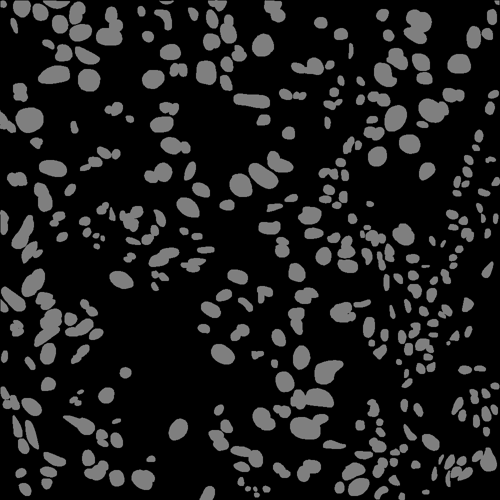

In [12]:
Image.fromarray(127*np.array(img)).resize((500,500))#.save('mask.png')

In [13]:
import os
for root,dir,files in os.walk('/content/MoNuSegTrainingData'):
  print(root)
  print(dir)
  print(files)
  print('**************************************************')

/content/MoNuSegTrainingData
['Annotations', 'Tissue Images']
[]
**************************************************
/content/MoNuSegTrainingData/Annotations
[]
['TCGA-21-5786-01Z-00-DX1.xml', 'TCGA-G9-6356-01Z-00-DX1.xml', 'TCGA-G2-A2EK-01A-02-TSB.xml', 'TCGA-G9-6363-01Z-00-DX1.xml', 'TCGA-A7-A13F-01Z-00-DX1.xml', 'TCGA-KB-A93J-01A-01-TS1.xml', 'TCGA-B0-5710-01Z-00-DX1.xml', 'TCGA-A7-A13E-01Z-00-DX1.xml', 'TCGA-G9-6362-01Z-00-DX1.xml', 'TCGA-G9-6336-01Z-00-DX1.xml', 'TCGA-B0-5698-01Z-00-DX1.xml', 'TCGA-CH-5767-01Z-00-DX1.xml', 'TCGA-B0-5711-01Z-00-DX1.xml', 'TCGA-HE-7130-01Z-00-DX1.xml', 'TCGA-E2-A14V-01Z-00-DX1.xml', 'TCGA-NH-A8F7-01A-01-TS1.xml', 'TCGA-HE-7129-01Z-00-DX1.xml', 'TCGA-38-6178-01Z-00-DX1.xml', 'TCGA-AR-A1AS-01Z-00-DX1.xml', 'TCGA-RD-A8N9-01A-01-TS1.xml', 'TCGA-21-5784-01Z-00-DX1.xml', 'TCGA-G9-6348-01Z-00-DX1.xml', 'TCGA-49-4488-01Z-00-DX1.xml', 'TCGA-AY-A8YK-01A-01-TS1.xml', 'TCGA-AR-A1AK-01Z-00-DX1.xml', 'TCGA-DK-A2I6-01A-01-TS1.xml', 'TCGA-E2-A1B5-01Z-00-DX1.xml', 'T

In [14]:
from shutil import copyfile
import matplotlib.pyplot as plt
%matplotlib inline

def get_polygons(x):
  mydoc = minidom.parse(x)
  Regions = mydoc.getElementsByTagName('Region')
  xy=[]
  for index,region in enumerate(Regions):
    vertices=region.getElementsByTagName('Vertex')
    xy.append([(float(vertex.getAttribute('X')),float(vertex.getAttribute('Y'))) for i,vertex in enumerate(vertices)])
  return xy

def get_masks(x):
  xy=get_polygons(x)
  img = Image.new('L', (1000, 1000), 0)
  for i in xy:
    ImageDraw.Draw(img).polygon(i, outline=1, fill=1)
  return Image.fromarray(127*np.array(img))



def save_datapoint(x,folder,name):
  label=get_masks('/content/MoNuSegTrainingData/Annotations/'+x)
  image=Image.open('/content/MoNuSegTrainingData/Tissue Images/'+x.replace('xml','tif'))
  image=image.resize((128,128))
  label=label.resize((128,128))

  plt.subplot(1,2,1)
  plt.imshow(image,interpolation='none')
  plt.subplot(1,2,2)
  plt.imshow(label,cmap='gray',interpolation='none')
  plt.show()
  print(np.array(image).shape,' ',np.array(label).shape)
  image.save(folder+'/img/'+name.zfill(4)+'.png')
  label.save(folder+'/labelcol/'+name.zfill(4)+'.png')

In [15]:
!rm -rf /content/drive/MyDrive/MiniProject/test\ folder
!rm -rf /content/drive/MyDrive/MiniProject/train\ folder
!rm -rf /content/drive/MyDrive/MiniProject/validation\ folder

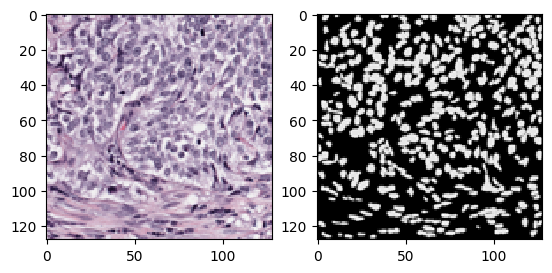

(128, 128, 3)   (128, 128)


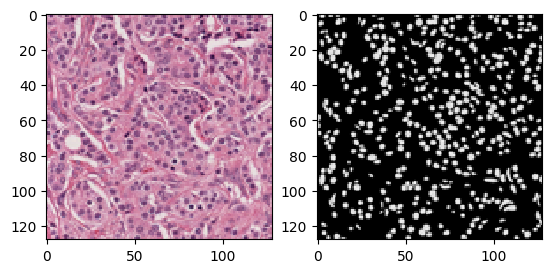

(128, 128, 3)   (128, 128)


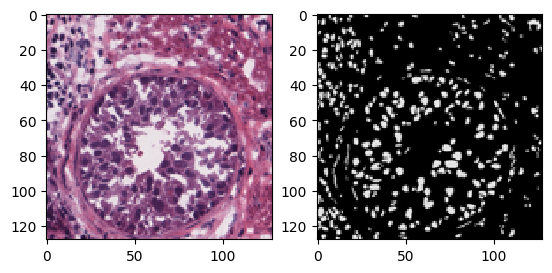

(128, 128, 3)   (128, 128)


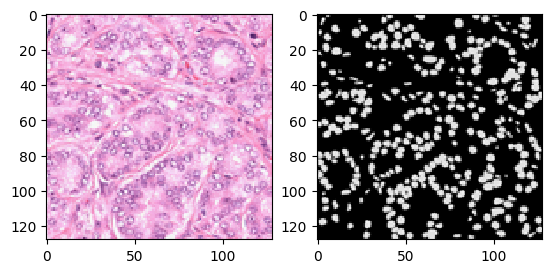

(128, 128, 3)   (128, 128)


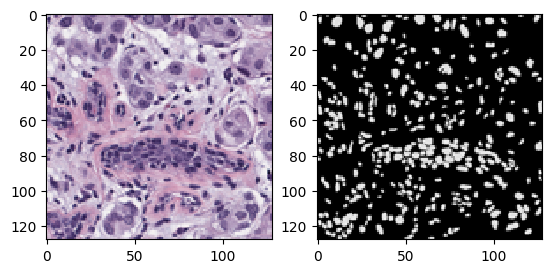

(128, 128, 3)   (128, 128)


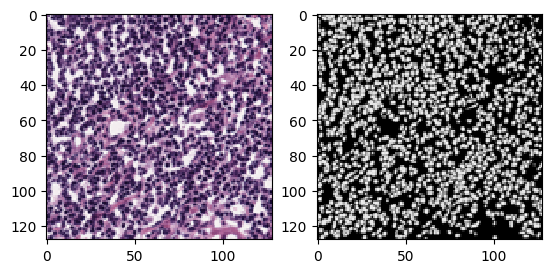

(128, 128, 3)   (128, 128)


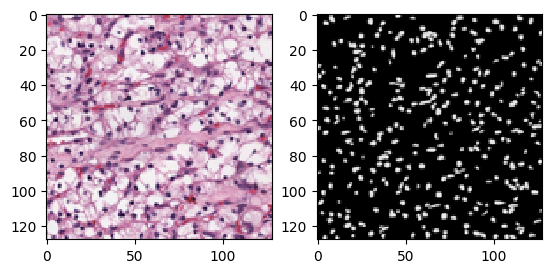

(128, 128, 3)   (128, 128)


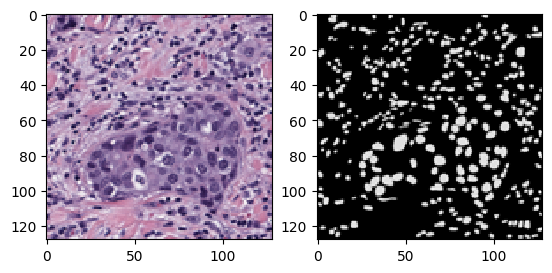

(128, 128, 3)   (128, 128)


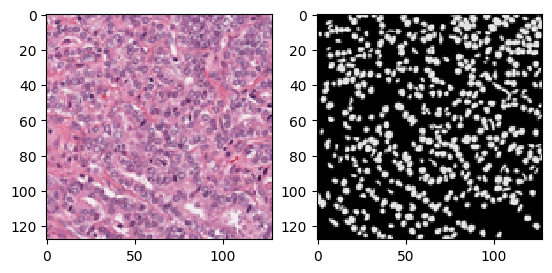

(128, 128, 3)   (128, 128)


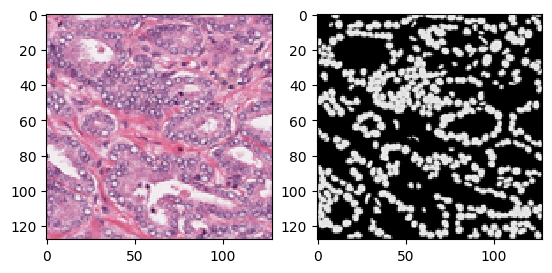

(128, 128, 3)   (128, 128)


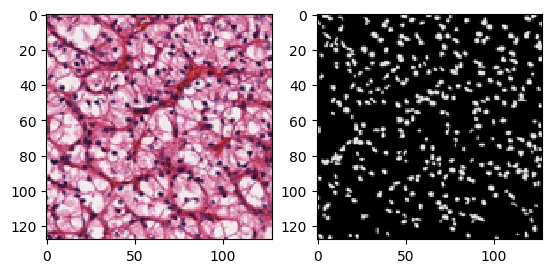

(128, 128, 3)   (128, 128)


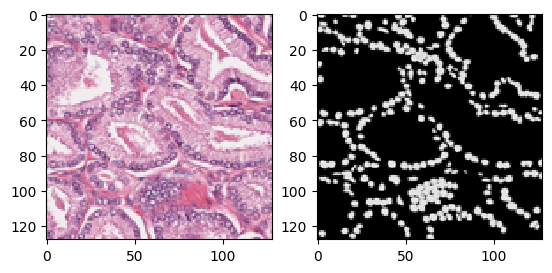

(128, 128, 3)   (128, 128)


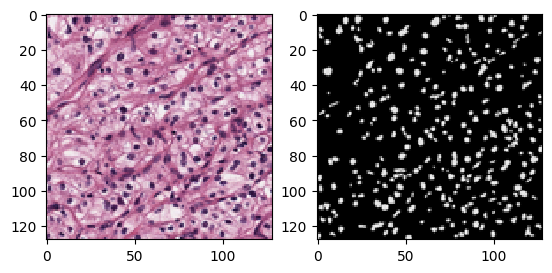

(128, 128, 3)   (128, 128)


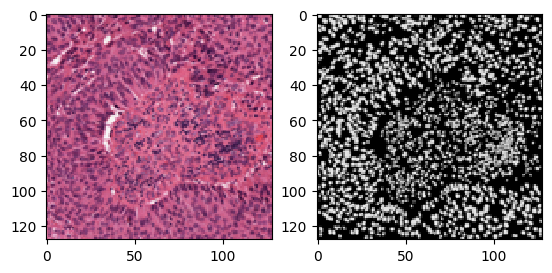

(128, 128, 3)   (128, 128)


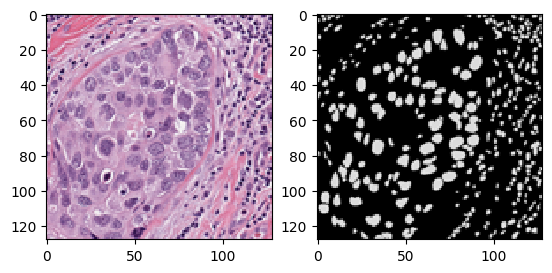

(128, 128, 3)   (128, 128)


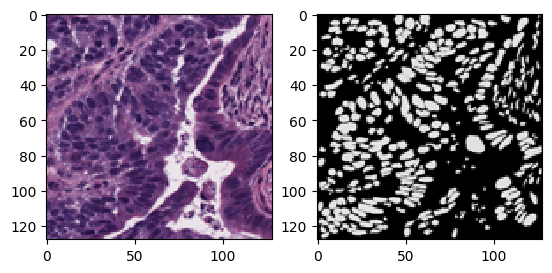

(128, 128, 3)   (128, 128)


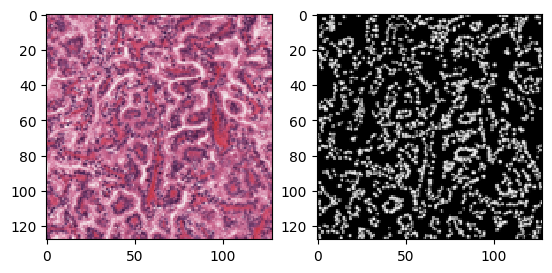

(128, 128, 3)   (128, 128)


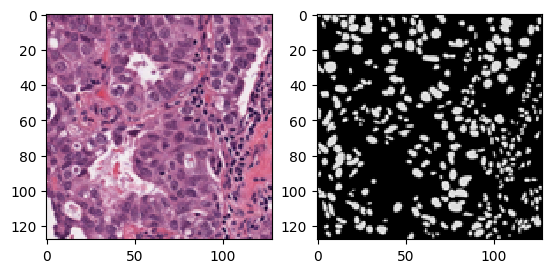

(128, 128, 3)   (128, 128)


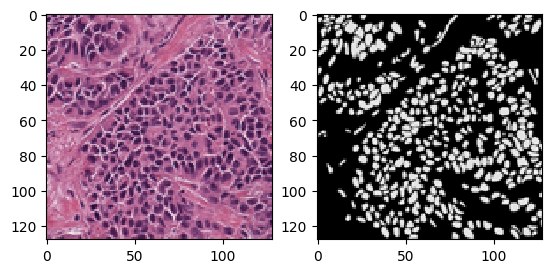

(128, 128, 3)   (128, 128)


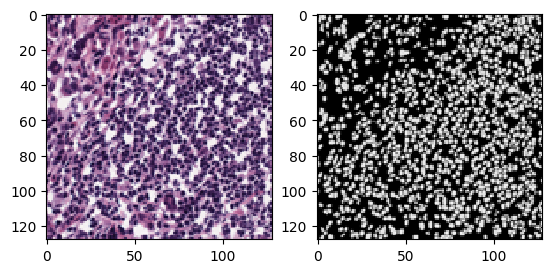

(128, 128, 3)   (128, 128)


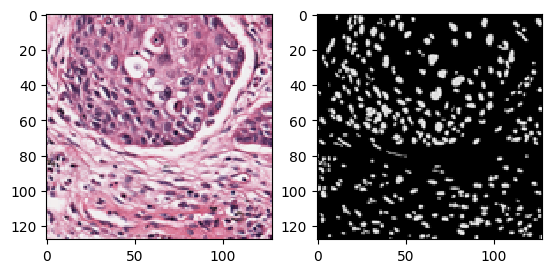

(128, 128, 3)   (128, 128)


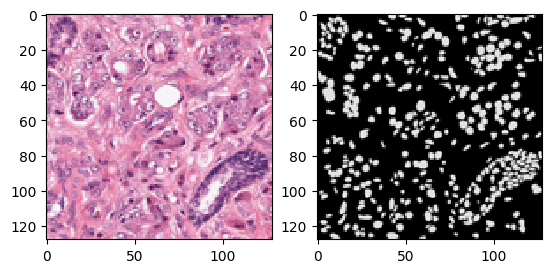

(128, 128, 3)   (128, 128)


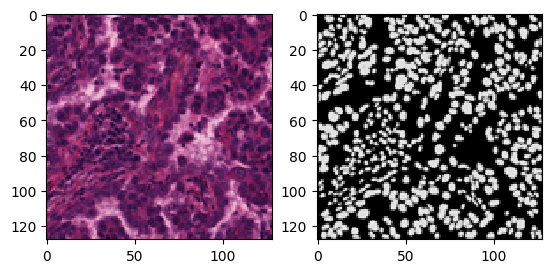

(128, 128, 3)   (128, 128)


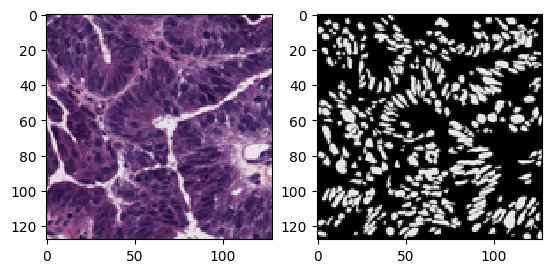

(128, 128, 3)   (128, 128)


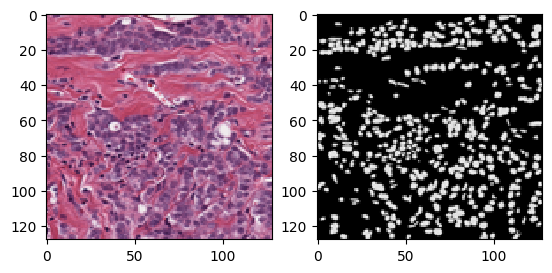

(128, 128, 3)   (128, 128)


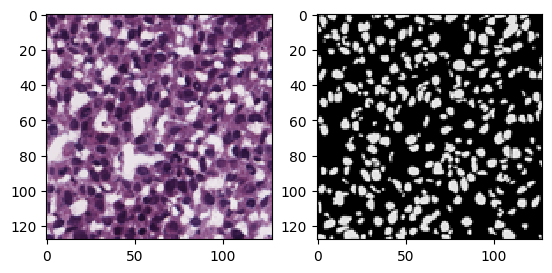

(128, 128, 3)   (128, 128)


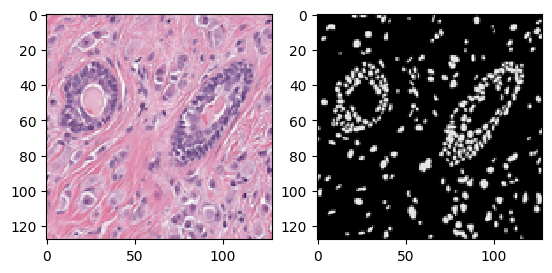

(128, 128, 3)   (128, 128)


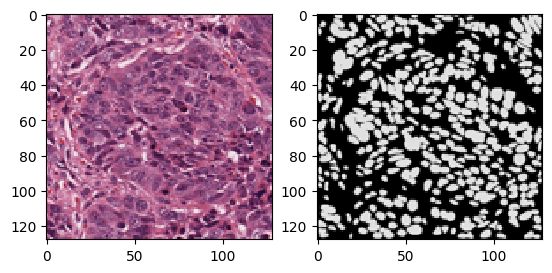

(128, 128, 3)   (128, 128)


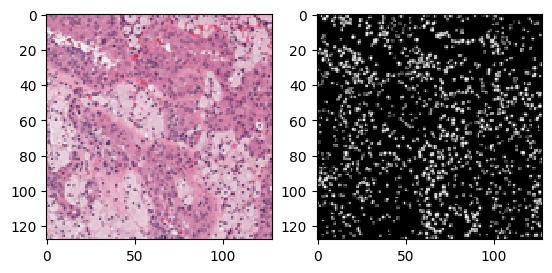

(128, 128, 3)   (128, 128)


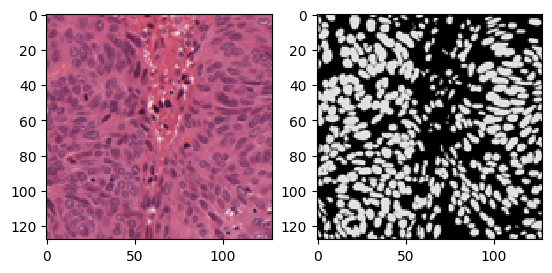

(128, 128, 3)   (128, 128)


In [16]:
import random
import itertools

for i,j in itertools.product(['/content/drive/MyDrive/MiniProject/train folder/',
                              '/content/drive/MyDrive/MiniProject/validation folder/',
                              '/content/drive/MyDrive/MiniProject/test folder/'],
                             ['img',
                              'labelcol']):
  os.makedirs(i+j,exist_ok=True)
random.random()



v,t = 0,0
_, _, filenames = next(os.walk('/content/MoNuSegTrainingData/Annotations'))
for i in filenames:
  if random.random()<=0.167:
    v+=1
    save_datapoint(i,'/content/drive/MyDrive/MiniProject/validation folder',str(v))
  else:
    t+=1
    save_datapoint(i,'/content/drive/MyDrive/MiniProject/train folder',str(t))

In [17]:
train_DIR='/content/drive/MyDrive/MiniProject/train folder'
validation_DIR='/content/drive/MyDrive/MiniProject/validation folder'
test_DIR='/content/drive/MyDrive/MiniProject/test folder'
train_res_DIR='/content/drive/MyDrive/MiniProject/train results'
test_rese_DIR='/content/drive/MyDrive/MiniProject/test_results'
command="python Medical-Transformer/train.py \
 --train_dataset \"{}\" \
 --val_dataset \"{}\" \
 --direc '{}' \
 --batch_size 4 \
 --epoch 10 \
 --save_freq 10 \
 --modelname \"MedT\" \
 --learning_rate 0.001 \
 --imgsize 128 \
 --gray \"no\" \
".format(train_DIR,validation_DIR,train_res_DIR)

!{command}

Total_params: 1560116
epoch [0/10], loss:0.4406
epoch [1/10], loss:0.3179
epoch [2/10], loss:0.2981
epoch [3/10], loss:0.2940
epoch [4/10], loss:0.3103
epoch [5/10], loss:0.2902
epoch [6/10], loss:0.2988
epoch [7/10], loss:0.2953
epoch [8/10], loss:0.2785
epoch [9/10], loss:0.2772


In [18]:
def save_datapoint(x,folder,name):
  label=get_masks('/content/MoNuSegTestData/'+x)
  image=Image.open('/content/MoNuSegTestData/'+x.replace('xml','tif'))
  image=image.resize((128,128))
  label=label.resize((128,128))

  plt.subplot(1,2,1)
  plt.imshow(image,interpolation='none')
  plt.subplot(1,2,2)
  plt.imshow(label,cmap='gray',interpolation='none')
  plt.show()
  print(np.array(image).shape,' ',np.array(label).shape)
  image.save(folder+'/img/'+name.zfill(4)+'.png')
  label.save(folder+'/labelcol/'+name.zfill(4)+'.png')

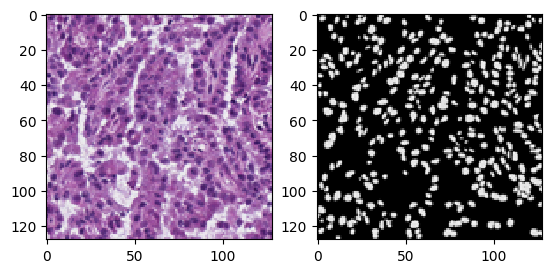

(128, 128, 3)   (128, 128)


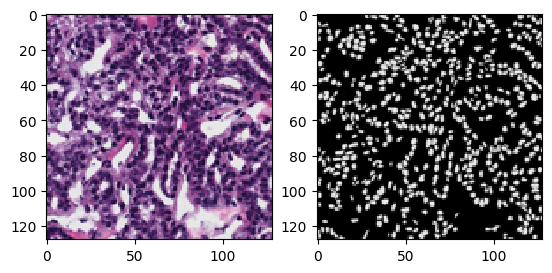

(128, 128, 3)   (128, 128)


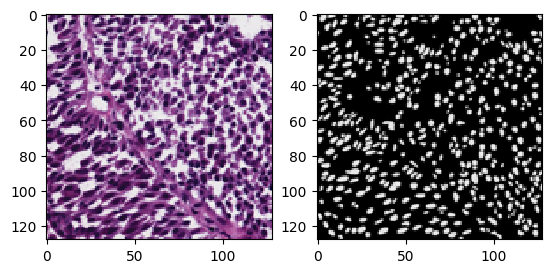

(128, 128, 3)   (128, 128)


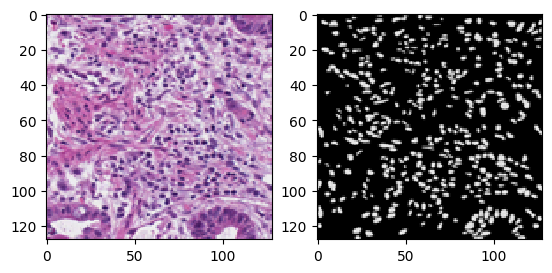

(128, 128, 3)   (128, 128)


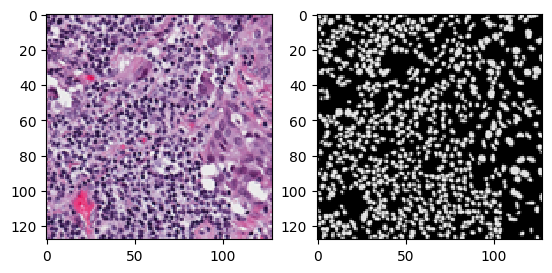

(128, 128, 3)   (128, 128)


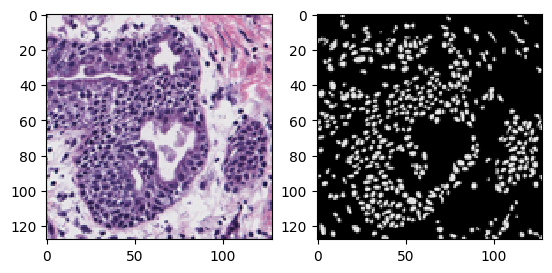

(128, 128, 3)   (128, 128)


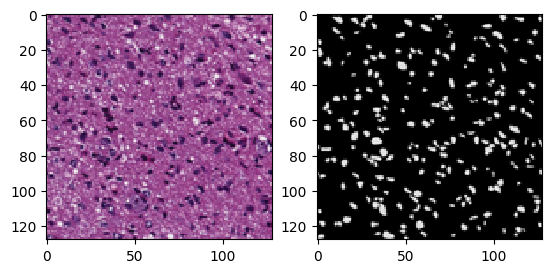

(128, 128, 3)   (128, 128)


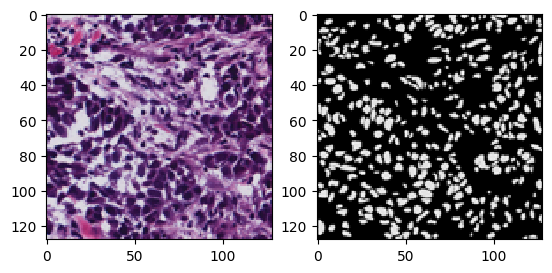

(128, 128, 3)   (128, 128)


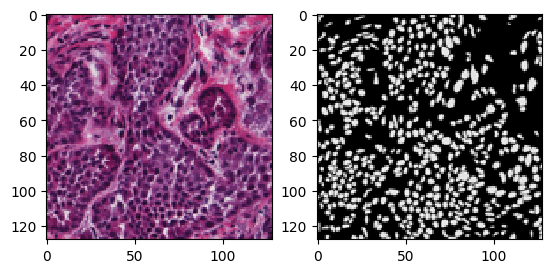

(128, 128, 3)   (128, 128)


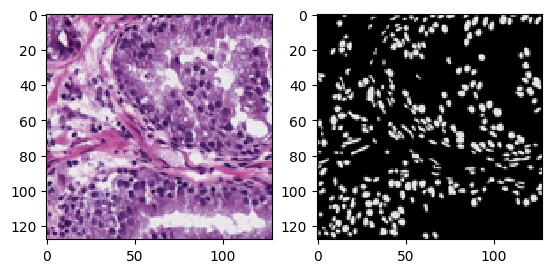

(128, 128, 3)   (128, 128)


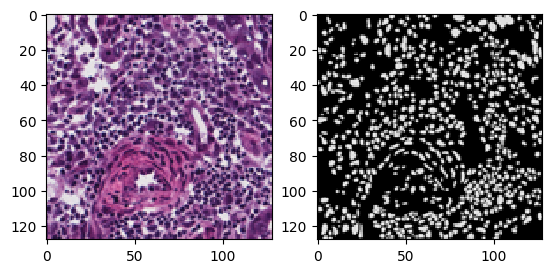

(128, 128, 3)   (128, 128)


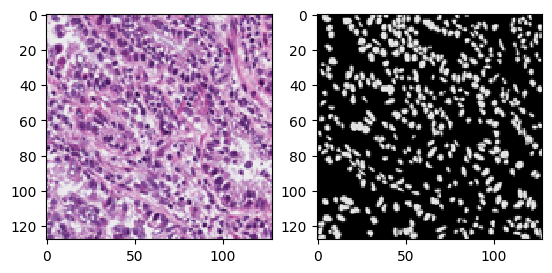

(128, 128, 3)   (128, 128)


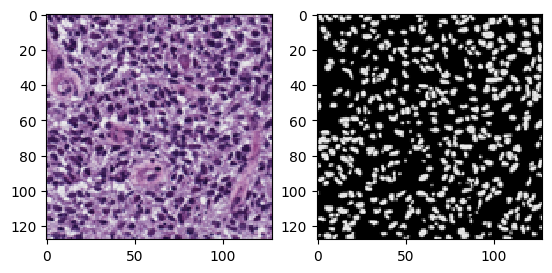

(128, 128, 3)   (128, 128)


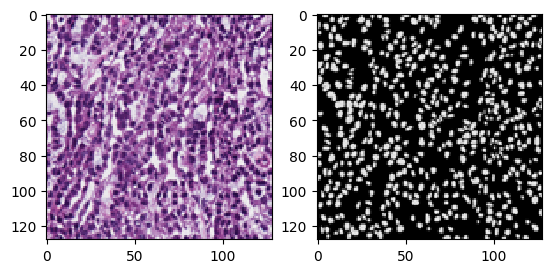

(128, 128, 3)   (128, 128)


In [19]:
c=0
for i in os.listdir('/content/MoNuSegTestData/'):
  if i.endswith('xml'):
    c+=1
    save_datapoint(i,'/content/drive/MyDrive/MiniProject/test folder',str(c))

In [20]:
command2="python Medical-Transformer/test.py \
--loaddirec \"{}\" \
--val_dataset \"{}\" \
--train_dataset \"{}\" \
--direc '{}' \
--batch_size 1 \
--modelname \"MedT\" \
--imgsize 128 \
--gray \"no\"".format('/content/drive/MyDrive/MiniProject/train results/0/MedT.pth',test_DIR,test_DIR, test_rese_DIR)
!{command2}

Traceback (most recent call last):
  File "/content/Medical-Transformer/test.py", line 62, in <module>
    aug = args.aug
AttributeError: 'Namespace' object has no attribute 'aug'


In [21]:
N=328

st=0

Fsc=[]

MIU=[]

PA=[]

bestfsc=0

bestmiu=0
bestpa=0
bestep=0

folder='/content/drive/MyDrive/MiniProject/test folder/labelcol'
listinfo=os.listdir(folder)
listinfo

['0001.png',
 '0002.png',
 '0003.png',
 '0004.png',
 '0005.png',
 '0006.png',
 '0007.png',
 '0008.png',
 '0009.png',
 '0010.png',
 '0011.png',
 '0012.png',
 '0013.png',
 '0014.png']

In [22]:
from sklearn.metrics import jaccard_score,f1_score
f1,iou=[],[]
for i in listinfo:
        I = np.array(Image.open('/content/drive/MyDrive/MiniProject/test folder/labelcol/'+i))
        I=np.where(I>=127,1,0)

        L = np.array(Image.open('/content/drive/MyDrive/MiniProject/test_results/'+i))
        L=np.where(L>=127,1,0)

        y_true,y_pred = I.flatten(),L.flatten()
        f1.append(f1_score(y_true,y_pred))
        iou.append(jaccard_score(y_true,y_pred))
print(f1,iou)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [23]:
np.mean(f1),np.mean(iou)

(0.0, 0.0)

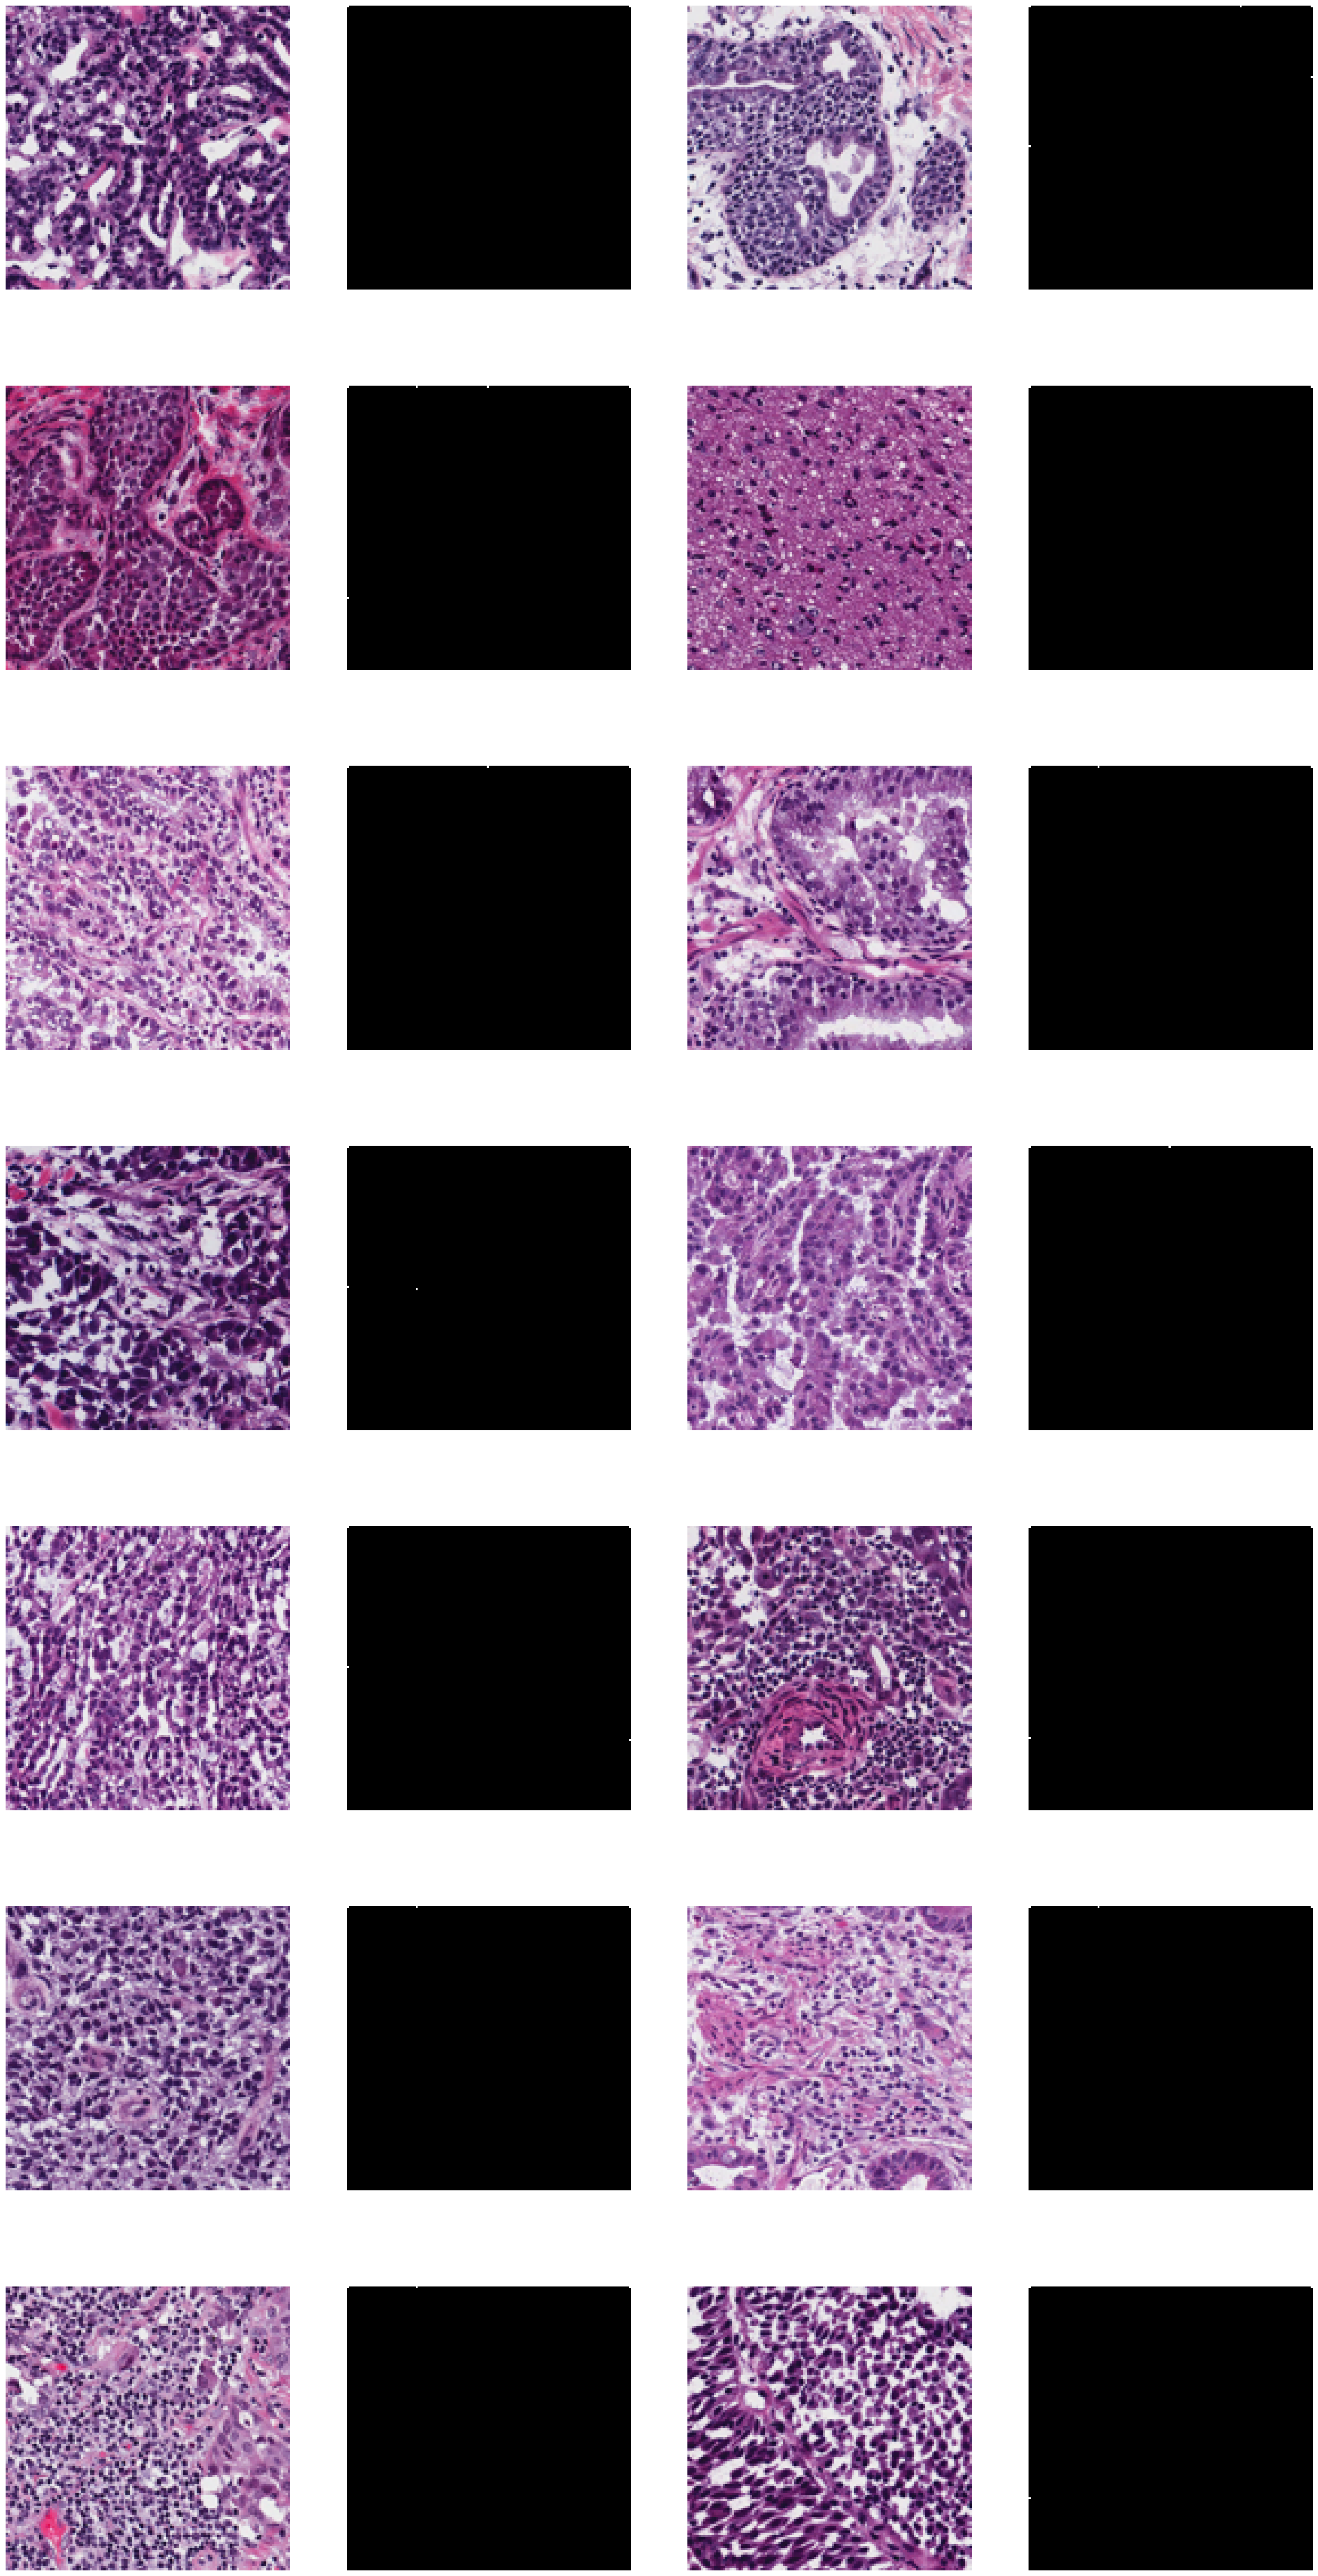

In [24]:

count=0
fig, ax = plt.subplots(7,4,figsize=(30,60))

[axi.set_axis_off() for axi in ax.ravel()]
for index,k in enumerate(os.listdir('/content/drive/MyDrive/MiniProject/test_results')):

  i='/content/drive/MyDrive/MiniProject/test folder/img/'+k
  j='/content/drive/MyDrive/MiniProject/test_results/'+k
  img=Image.open(i)
  label=Image.open(j)
  # plt.subplot(7,4,count)
  ax[count // 4,count%4].imshow(img)
  count+=1
  # plt.subplot(7,4,count)
  ax[count // 4,count%4].imshow(label,cmap='gray')
  count+=1
plt.savefig('/content/drive/MyDrive/MiniProject/test_results.png')

In [25]:
!pip3 install smop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
  Created wheel for smop: filename=smop-0.41-py3-none-any.whl size=49189 sha256=1fbc438b3e349dbda9b4ce20d52674d7b6d1e7be95b450152f6a10a9261b6f41
  Stored in directory: /root/.cache/pip/wheels/d0/03/7e/a10363e9405272c12cb33c24800be0b568194fcedc73f90298
Successfully built smop


In [ ]:
# # !ls /root/.local/lib/python3.10/site-packages/
# import sys
# # sys.path.remove("/root/.local/bin/smop")
# print(sys.path)

In [ ]:
!smop /content/Medical-Transformer/performancemetrics_monuseg.m --output perf.py

/usr/local/lib/python3.10/dist-packages/ply/lex.py:760: FutureWarning: Possible nested set at position 65
  c = re.compile('(?P<%s>%s)' % (fname, _get_regex(f)), self.reflags)
/usr/local/lib/python3.10/dist-packages/ply/lex.py:498: FutureWarning: Possible nested set at position 118
  lexre = re.compile(regex, reflags)
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
str
